In [1]:
import pickle
import os,sys
import numpy as np
from baseline.AKE.ake import AKE
from baseline.Kriging.kriging import OrdryKriging
from baseline.NMF.nmf import NMF
from baseline.ST_MVL.st_mvl import ST_MVL
import matplotlib.pyplot as plt
import pickle
from matplotlib import rc
import matplotlib.font_manager as mf

my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

In [2]:
with open('../tensor2.pkl','rb') as f:
    tensor_array = pickle.load(f)

with open('../new_indices.pkl','rb') as f:
    new_indices = pickle.load(f)

tensor_array = np.array(tensor_array)
tensor_array = tensor_array[new_indices]

In [3]:
with open('../2_ake_loss_total.pkl','rb') as f:
    ake_loss_total = np.array(pickle.load(f)) / 133

with open('../2_kriging_loss_total.pkl','rb') as f:
    kriging_loss_total = np.array(pickle.load(f)) / 133
    
with open('../2_nmf_loss_total.pkl','rb') as f:
    nmf_loss_total = np.array(pickle.load(f)) / 133

with open('../2_st_mvl_loss_total.pkl','rb') as f:
    st_mvl_loss_total = np.array(pickle.load(f)) /133

# read dcs reconstruction loss
with open('../2_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total = np.array(pickle.load(f))/133

with open('3_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total1 = np.array(pickle.load(f))/133

with open('4_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total2 = np.array(pickle.load(f))/133

with open('5_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total3 = np.array(pickle.load(f))/133

with open('6_dcs_loss_total.pkl','rb') as f:
    dcs_loss_total4 = np.array(pickle.load(f))/133

# with open('7_dcs_loss_total.pkl','rb') as f: # 老模型，10000次迭代次数，去除本地噪声
    # dcs_loss_total5 = np.array(pickle.load(f))/133

with open('10_dcs_loss_total.pkl','rb') as f: # 新模型，80000(4x)次迭代次数，去除本地噪声
    dcs_loss_total5 = np.array(pickle.load(f))/133

with open('9_dcs_loss_total.pkl','rb') as f: # 新模型，80000次迭代次数，去除本底噪声
    dcs_loss_total6 = np.array(pickle.load(f))/133
    
with open('11_dcs_loss_total.pkl','rb') as f: # model 11，80000次迭代次数，去除本底噪声
    dcs_loss_total7 = np.array(pickle.load(f))/133
    
with open('12_dcs_loss_total.pkl','rb') as f: # model 12，80000次迭代次数，去除本底噪声
    dcs_loss_total8 = np.array(pickle.load(f))/133



In [4]:
with open('515_MAR_raw_timeslimit.pkl','rb') as f:
    MAR = np.array(pickle.load(f))/133

In [5]:
with open('515_MCAR_raw_timeslimit.pkl','rb') as f:
    MCAR = np.array(pickle.load(f))/133

In [6]:
with open('515_MNAR_raw_timeslimit.pkl','rb') as f:
    MNAR = np.array(pickle.load(f))/133

In [7]:
mar_mean = []

for i,j in enumerate(MAR):
    mar_mean.append(np.mean(j))

mcar_mean = []

for i,j in enumerate(MCAR):
    mcar_mean.append(np.mean(j))
    
mnar_mean = []

for i,j in enumerate(MNAR):
    mnar_mean.append(np.mean(j))

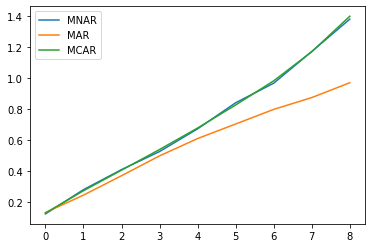

In [8]:
plt.plot(mnar_mean,label='MNAR')
plt.plot(mar_mean,label='MAR')
plt.plot(mcar_mean,label='MCAR')
plt.legend()

In [5]:
def generate_missing_matrix(data_matrix,miss_ratio=0.1):
    origin  = data_matrix.copy()
    spatial_size = data_matrix.shape[0]
    temporal_size = data_matrix.shape[1]
    k = round(spatial_size*temporal_size*miss_ratio)
    mask = np.ones_like(data_matrix)
    ri = np.random.choice(spatial_size*temporal_size,k,replace=False)
    origin.flat[ri] = 0
    mask.flat[ri] = 0
    return origin,mask
data_matrix,mask =generate_missing_matrix(tensor_array[0],0.3)

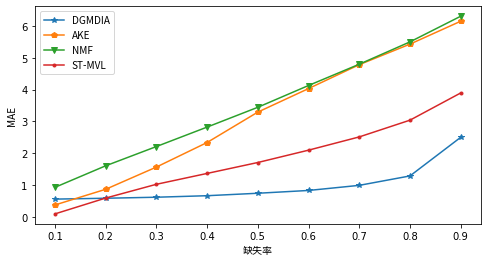

In [14]:
ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []
dcs_mean3 = []
dcs_mean4 = []
dcs_mean5 = []
dcs_mean6 = []

dcs_mean7 = [] # model 11
dcs_mean8 = [] # model 12


for i,j in enumerate(ake_loss_total):
    ake_mean.append(np.mean(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))
    dcs_mean3.append(np.mean(dcs_loss_total3[i]))
    dcs_mean4.append(np.mean(dcs_loss_total4[i]))
    dcs_mean5.append(np.mean(dcs_loss_total5[i]))
    dcs_mean6.append(np.mean(dcs_loss_total6[i]))
    
    dcs_mean7.append(np.mean(dcs_loss_total7[i]))
    dcs_mean8.append(np.mean(dcs_loss_total8[i]))

x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(8,4)

# with plt.style.context(['science','ieee','no-latex','cjk-sc-font']) :
if True:
    
#     plt.plot(x_plot,dcs_mean7,label='DCS11',marker='*') # 带有迭代次数限制的完整版
#     plt.plot(x_plot,dcs_mean8,label='DCS12',marker='*') # 带有迭代次数限制的完整版

    # plt.plot(x_plot,dcs_mean3,label='dcs3',marker='o')
    # plt.plot(x_plot,dcs_mean4,label='dcs4')
    # plt.plot(x_plot,dcs_mean5,label='DCS5',marker='*') # 带有迭代次数限制的完整版
    plt.plot(x_plot,dcs_mean2,label='DGMDIA',marker='*') # 带有迭代次数限制的完整版
#     plt.plot(x_plot,dcs_mean5,label='DCS-new-8x',marker='*') # 带有迭代次数限制的完整版
#     plt.plot(x_plot,dcs_mean6,label='DCS-new',marker='*') # 带有迭代次数限制的完整版
    plt.plot(x_plot,ake_mean,label='AKE',marker='p')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
    plt.plot(x_plot,nmf_mean,label='NMF',marker='v')
    plt.plot(x_plot,st_mvl_mean,label='ST-MVL',marker='.')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
    # plt.plot(x_plot,dcs_mean1,label='原始数据集上训练',marker='o')
    

    plt.xlabel('缺失率',fontproperties = my_font)
# plt.ylabel('误差      ',rotation=0)
    plt.ylabel('MAE',fontproperties = my_font)
# plt.xticks(np.arange(1,10,1))
    plt.legend(prop=my_font)
    plt.savefig('26_dcs_mean_loss_bench_c.png',dpi=300,bbox_inches='tight')

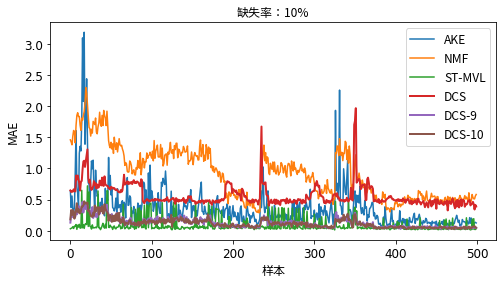

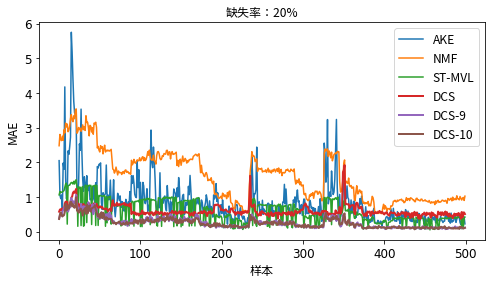

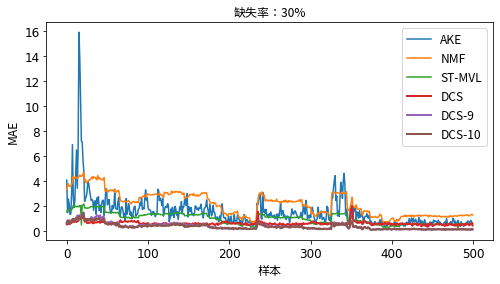

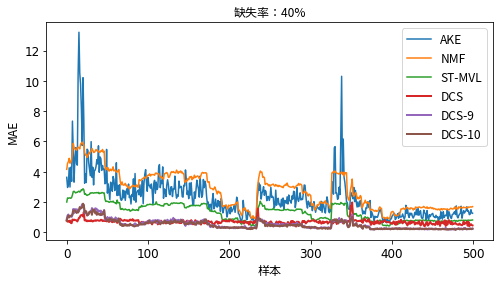

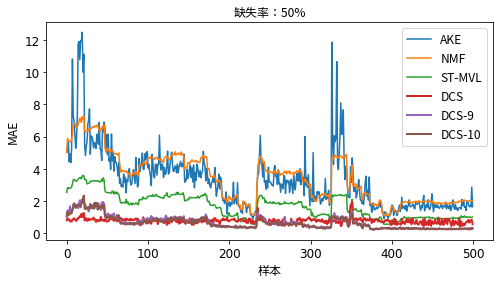

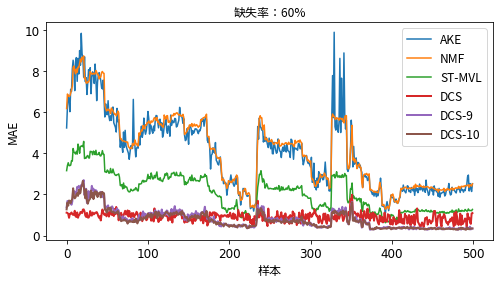

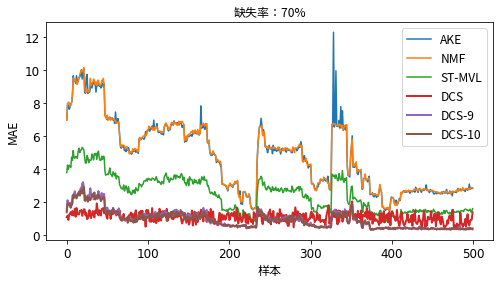

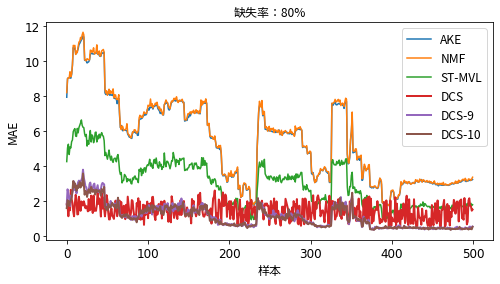

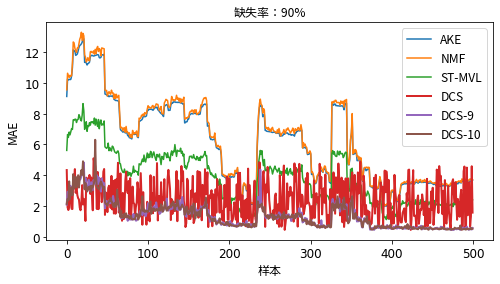

In [65]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total
my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

for i in range(0,9,1):
#     ake_loss_total[i]
    plt.figure()
    # plt.ylim(-0,10)
    plt.plot(ake_loss_total[i],label='AKE')
    # plt.plot(kriging_loss_total[i],label='kriging_loss')
    plt.plot(nmf_loss_total[i],label='NMF')
    plt.plot(st_mvl_loss_total[i],label='ST-MVL')
    # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
    # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
    plt.plot(dcs_loss_total3[i],linewidth=2,label='DCS') # 带次数限制的版本
    plt.plot(dcs_loss_total6[i],linewidth=2,label='DCS-9') # 带次数限制的版本
    plt.plot(dcs_loss_total5[i],linewidth=2,label='DCS-10') # 带次数限制的版本

    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel("MAE",fontproperties = my_font)
    plt.title('缺失率：{}%'.format((i+1)*10),fontproperties = my_font)

    plt.legend(prop=my_font)
    # plt.savefig('13_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
    # plt.savefig('21_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight')# miss_ratio = 0.1
    # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

# Plot Examples

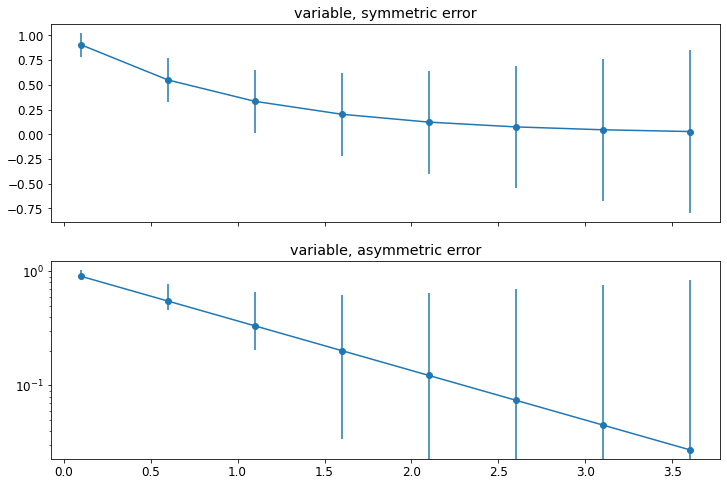

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# plt.plot(x,y)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, yerr=asymmetric_error, fmt='-o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

In [ ]:
upper_error

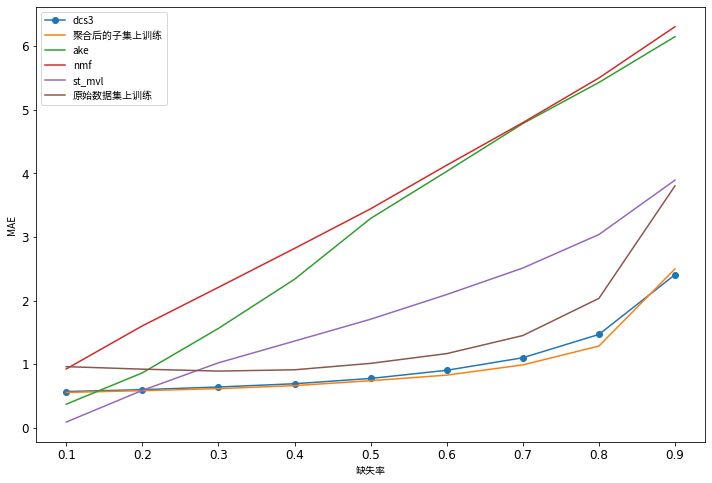

In [39]:
ake_mean = []
# kriging_mean = []
nmf_mean = []
st_mvl_mean = []
dcs_mean = []
dcs_mean1 = []
dcs_mean2 = []
dcs_mean3 = []
dcs_mean4 = []


dcs_upbound3 = []
dcs_lowbound3 = []

dcs_upbound4 = []
dcs_lowbound4 = []


dcs_std = []
dcs_std1 = []
dcs_std2 = []
dcs_std3 = []
dcs_std4 = []

ake_std = []
nmf_std = []
st_mvl_std = []


for i,j in enumerate(ake_loss_total):
    
    ake_mean.append(np.mean(ake_loss_total[i]))
    ake_std.append(np.std(ake_loss_total[i]))
#     kriging_mean.append(np.mean(kriging_loss_total[i]))
    nmf_mean.append(np.mean(nmf_loss_total[i]))
    nmf_std.append(np.std(nmf_loss_total[i]))
    st_mvl_mean.append(np.mean(st_mvl_loss_total[i]))
    st_mvl_std.append(np.mean(st_mvl_loss_total[i]))

    dcs_mean.append(np.mean(dcs_loss_total[i]))
    dcs_mean1.append(np.mean(dcs_loss_total1[i]))
    dcs_mean2.append(np.mean(dcs_loss_total2[i]))
    dcs_mean3.append(np.mean(dcs_loss_total3[i]))
    dcs_mean4.append(np.mean(dcs_loss_total4[i]))

    dcs_std.append(np.std(dcs_loss_total[i]))
    dcs_std1.append(np.std(dcs_loss_total1[i]))
    dcs_std2.append(np.std(dcs_loss_total2[i]))
    dcs_std3.append(np.std(dcs_loss_total3[i]))
    dcs_std4.append(np.std(dcs_loss_total4[i]))


    dcs_upbound3.append(np.max(dcs_loss_total3[i]))
    dcs_lowbound3.append(np.min(dcs_loss_total3[i]))

    dcs_upbound4.append(np.max(dcs_loss_total4[i]))
    dcs_lowbound4.append(np.min(dcs_loss_total4[i]))

# low_CI_bound, high_CI_bound = st.t.interval(0.95,data_points-1,loc=np.mean(data,0),scale=st.sem(data))



x_plot = np.arange(0.1,1,0.1)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize']=(12,8)

# with plt.style.context(['science','ieee','no-latex','cjk-sc-font']) :
if True:

    plt.plot(x_plot,dcs_mean3,label='dcs3',marker='o')
    plt.plot(x_plot,dcs_mean2,label='聚合后的子集上训练') # 带有迭代次数限制的完整版
    plt.plot(x_plot,ake_mean,label='ake')
# plt.plot(x_plot,kriging_mean,marker='o',ls='--',label='kriging')
    plt.plot(x_plot,nmf_mean,label='nmf')
    plt.plot(x_plot,st_mvl_mean,label='st_mvl')
# plt.plot(x_plot,dcs_mean,marker='o',linewidth=3,label='dcs_sa') # 不带有迭代限制的原始版
    plt.plot(x_plot,dcs_mean1,label='原始数据集上训练')

    # plt.plot(x_plot,dcs_mean4,label='dcs4')
    # plt.errorbar(x_plot,dcs_mean3,yerr=dcs_std3,label='dcs3-1',fmt='-o')
    # plt.errorbar(x_plot,nmf_mean,yerr=nmf_mean,label='nmf',fmt='-o')
    # plt.errorbar(x_plot,ake_mean,yerr=ake_std,label='ake',fmt='-o')

    # plt.errorbar(x_plot,dcs_mean2,yerr=dcs_std2,label='dcs2-1',fmt='-o')


    # plt.errorbar(x_plot,dcs_mean4,yerr=[dcs_lowbound4,dcs_upbound4],label='dcs4',fmt='-o')
    # plt.errorbar(x_plot,dcs_mean3,yerr=[dcs_lowbound3,dcs_upbound3],label='dcs3',fmt='-o')
    

    plt.xlabel('缺失率',fontproperties = my_font)
# plt.ylabel('误差      ',rotation=0)
    plt.ylabel('MAE',fontproperties = my_font)
# plt.xticks(np.arange(1,10,1))
    plt.legend(prop=my_font)
    # plt.savefig('20_dcs_mean_loss_bench_c.png',dpi=300)

In [9]:
class Imputation_Result:
    missing_ratio = 0
    missing_pattern = ''
    missing_start_p = ''
    
    ake_loss = []
    kriging_loss = []
    nmf_loss = []
    st_mvl_loss = []

In [10]:
# load SOTA
with open('416_MAR.pkl','rb') as f:
    sota_mar = pickle.load(f)
    
with open('416_MNAR_c.pkl','rb') as f:
    sota_mnar = pickle.load(f)

with open('416_MCAR.pkl','rb') as f:
    sota_mcar = pickle.load(f)

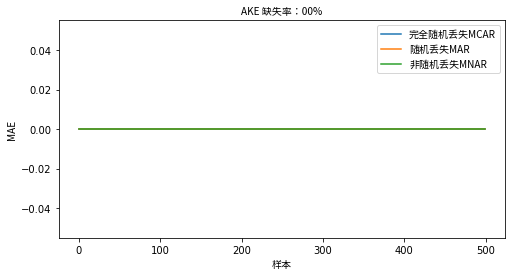

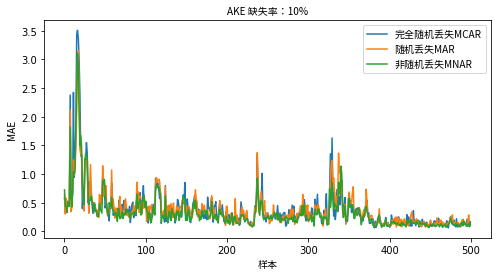

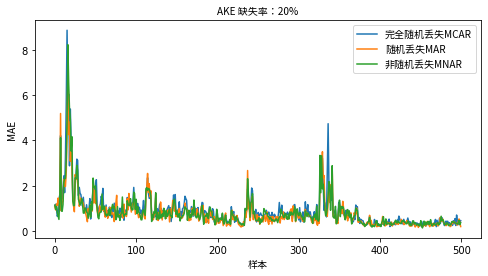

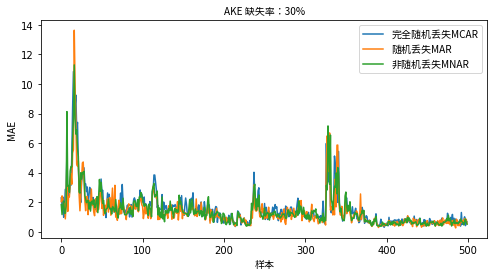

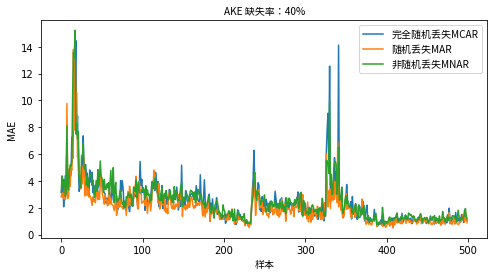

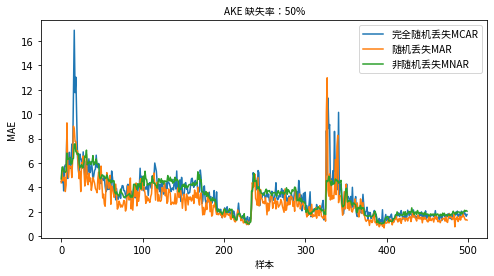

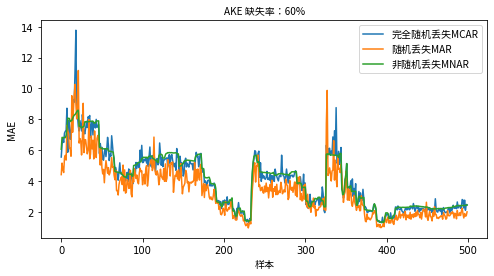

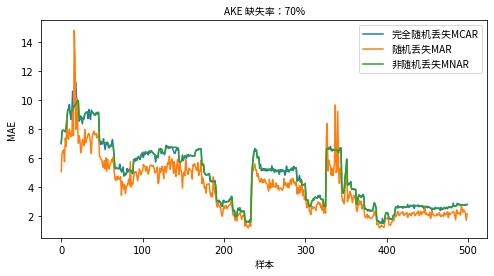

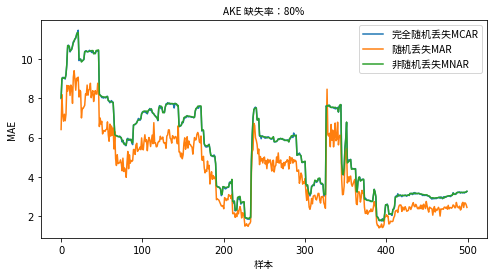

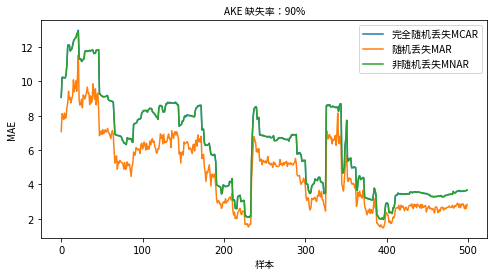

In [83]:
plt.rcParams['figure.figsize']=(8,4)

for i in range(0,10):
    plt.figure()
    plt.title('AKE 缺失率：{}0%'.format(i),fontproperties = my_font)
    plt.plot(np.array(sota_mcar[i].ake_loss)/133,label='完全随机丢失MCAR')
    plt.plot(np.array(sota_mar[i].ake_loss)/133,label='随机丢失MAR')
    plt.plot(np.array(sota_mnar[i].ake_loss)/133,label='非随机丢失MNAR')
    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel('MAE',fontproperties = my_font)
    plt.legend(prop=my_font)
    plt.savefig('25_ake_loss_p_{}.png'.format(i),dpi=300,bbox_inches='tight')



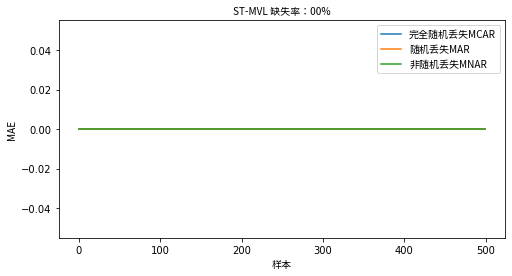

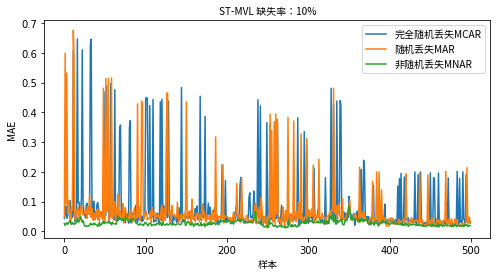

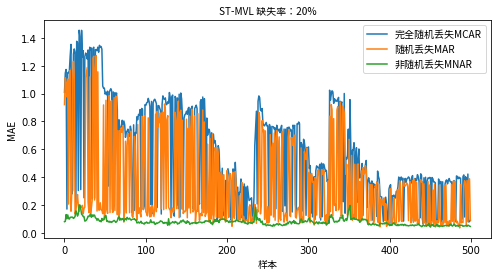

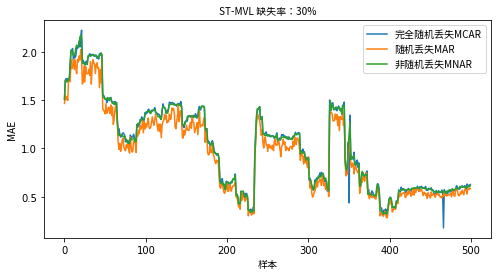

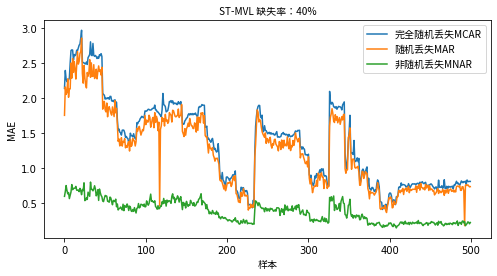

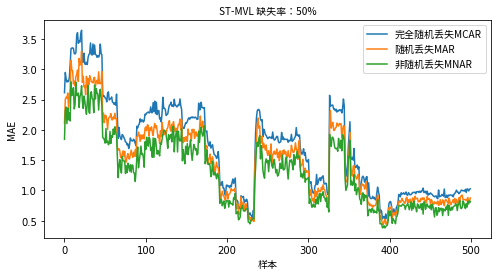

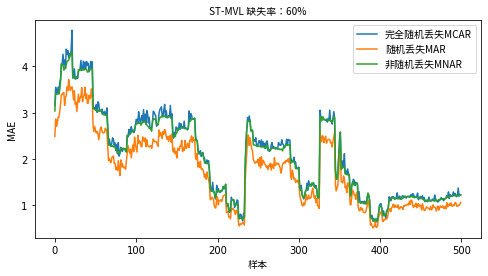

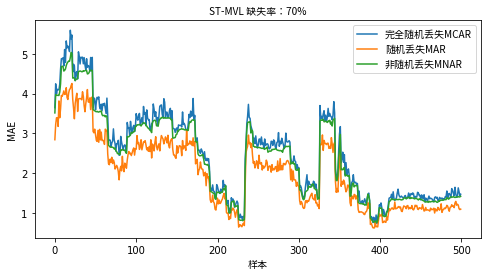

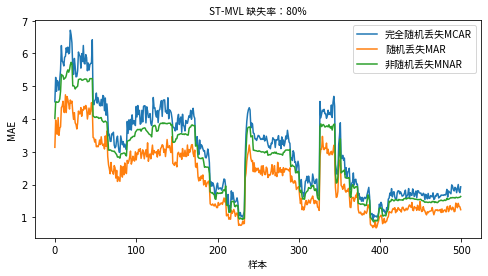

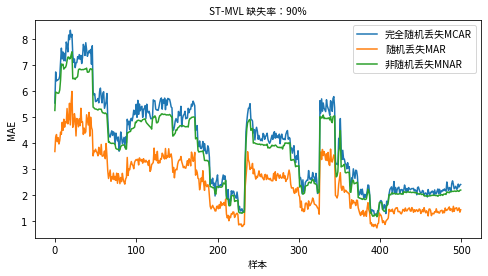

In [74]:
plt.rcParams['figure.figsize']=(8,4)

for i in range(0,10):
    plt.figure()
    plt.title('ST-MVL 缺失率：{}0%'.format(i),fontproperties = my_font)
    plt.plot(np.array(sota_mcar[i].st_mvl_loss)/133,label='完全随机丢失MCAR')
    plt.plot(np.array(sota_mar[i].st_mvl_loss)/133,label='随机丢失MAR')
    plt.plot(np.array(sota_mnar[i].st_mvl_loss)/133,label='非随机丢失MNAR')
#     plt.ylim(0,5)
    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel('MAE',fontproperties = my_font)
    plt.legend(prop=my_font)
    plt.savefig('25_st_mvl_loss_p_{}.png'.format(i),dpi=300,bbox_inches='tight')

#     plt.legend()

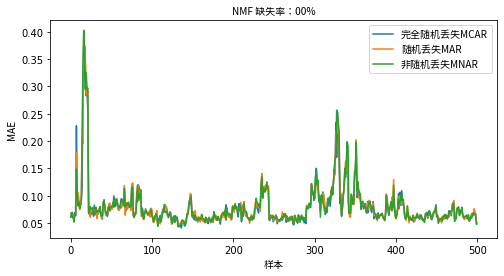

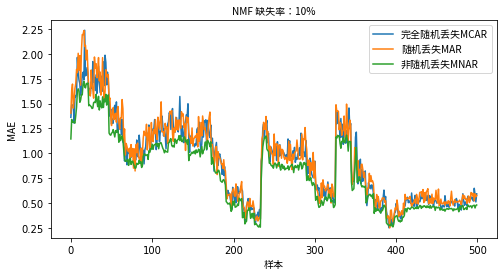

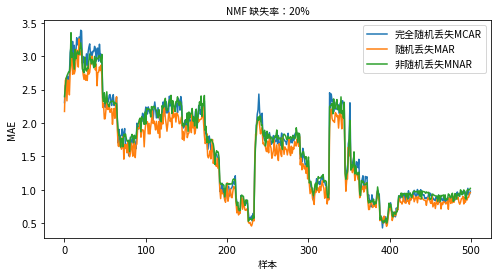

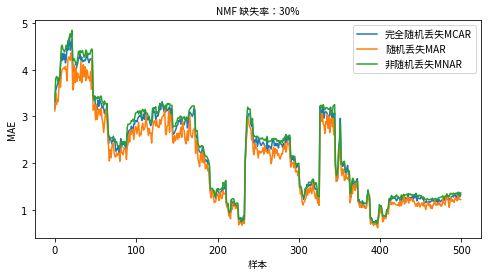

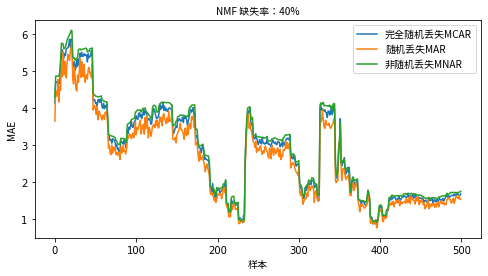

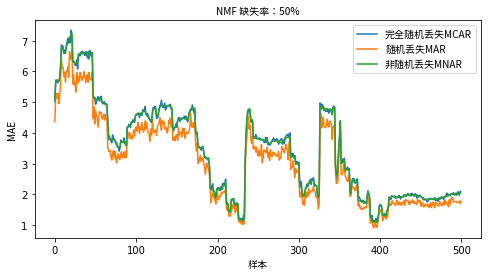

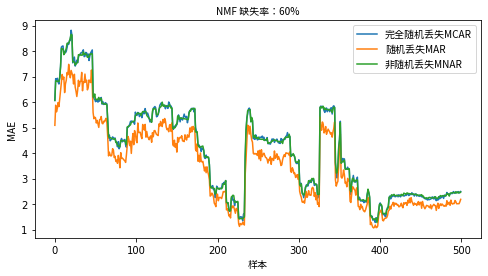

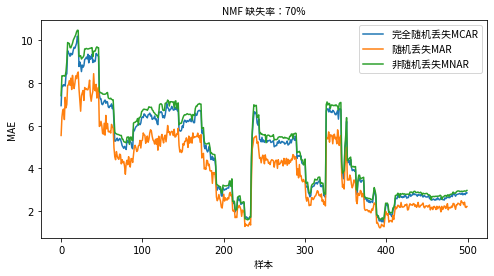

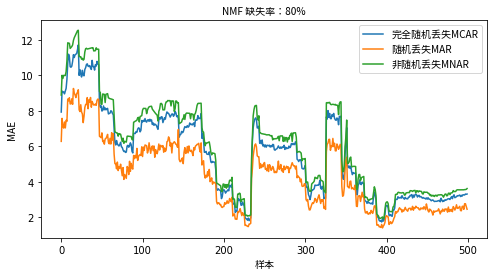

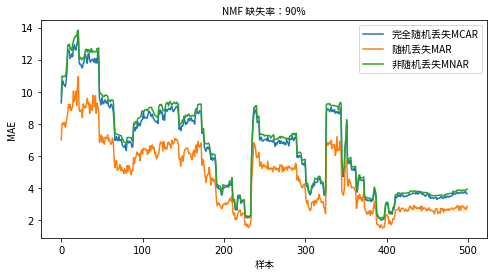

In [84]:
plt.rcParams['figure.figsize']=(8,4)

for i in range(0,10):
    plt.figure()
    plt.title('NMF 缺失率：{}0%'.format(i),fontproperties = my_font)
    plt.plot(np.array(sota_mcar[i].nmf_loss)/133,label='完全随机丢失MCAR')
    plt.plot(np.array(sota_mar[i].nmf_loss)/133,label='随机丢失MAR')
    plt.plot(np.array(sota_mnar[i].nmf_loss)/133,label='非随机丢失MNAR')
    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel('MAE',fontproperties = my_font)
    plt.legend(prop=my_font)
    plt.savefig('25_nmf_loss_p_{}.png'.format(i),dpi=300,bbox_inches='tight')



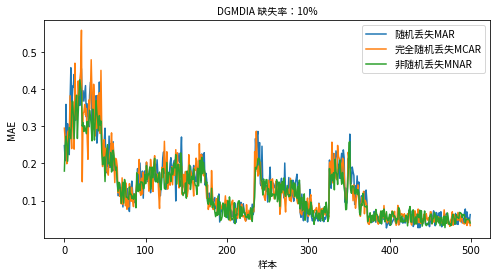

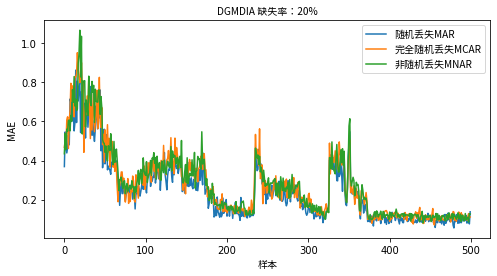

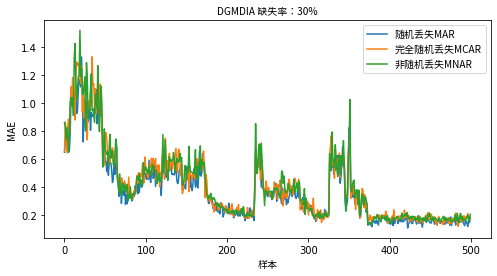

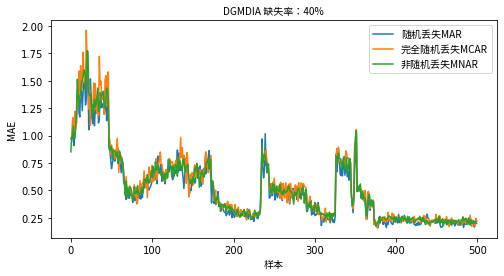

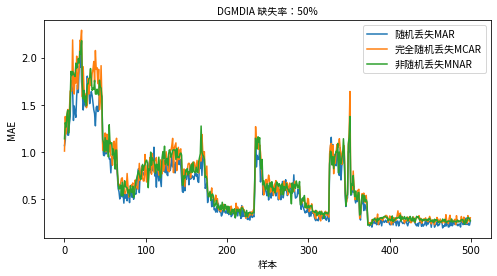

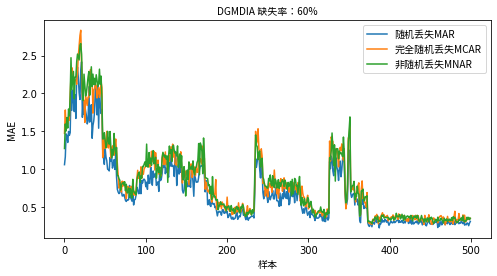

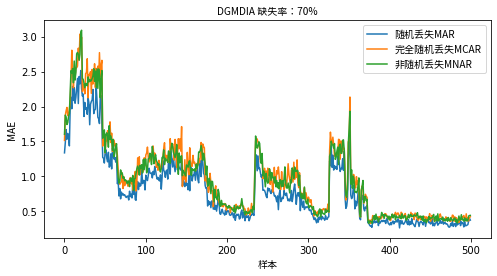

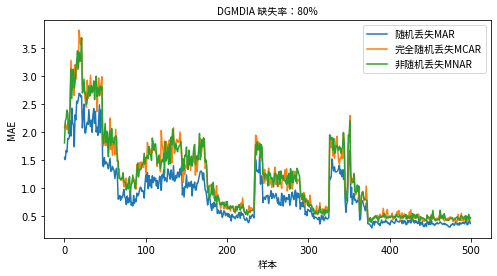

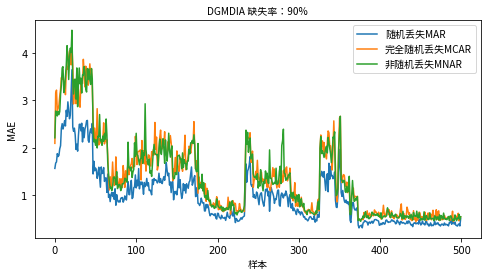

In [11]:
# per missing ratio

# ake_loss_total = []
# kriging_loss_total = []
# nmf_loss_total = []
# st_mvl_loss_total = []
# dcs_loss_total
my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

plt.rcParams['figure.figsize']=(8,4)


# print(len(ake_loss_total))

for i in range(0,9,1):
#     ake_loss_total[i]
    plt.figure()
    # plt.ylim(-0,10)
    plt.plot(np.array(MAR[i])/1,label='随机丢失MAR')
    # plt.plot(kriging_loss_total[i],label='kriging_loss')
    plt.plot(np.array(MCAR[i])/1,label='完全随机丢失MCAR')
    plt.plot(np.array(MNAR[i])/1,label='非随机丢失MNAR')
    # plt.plot(dcs_loss_total[i],linewidth=1,label='dcs_loss_sa') # 原始模型, 无迭代次数限制
    # plt.plot(dcs_loss_total2[i],linewidth=1,label='dcs_loss')
#     plt.plot(dcs_loss_total3[i],linewidth=2,label='DCS') # 带次数限制的版本
#     plt.plot(dcs_loss_total6[i],linewidth=2,label='DCS-9') # 带次数限制的版本
#     plt.plot(dcs_loss_total5[i],linewidth=2,label='DCS-10') # 带次数限制的版本

    plt.xlabel('样本',fontproperties = my_font)
    plt.ylabel("MAE",fontproperties = my_font)
    plt.title('DGMDIA 缺失率：{}%'.format((i+1)*10),fontproperties = my_font)

    plt.legend(prop=my_font)
    plt.savefig('26_dcs_loss_p_{}.png'.format(i),dpi=300,bbox_inches='tight')

    # plt.savefig('13_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
    # plt.savefig('21_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight')# miss_ratio = 0.1
    # plt.savefig('11_dcs_compare_loss_bench_{}_{}.png'.format(500,(i+1)*10),dpi=300,bbox_inches='tight',pad_inches=0)# miss_ratio = 0.1
# indices = int(miss_ratio*10-1)
# print(indices)

# size = 1000
# plt.rcParams['figure.figsize']=(12,8)
# # x_plot = np.arange(0,29834,1)
# plt.plot(ake_loss[:size],label='ake_loss',marker='o',ls='--')
# plt.plot(kriging_loss[:size],label='kriging_loss',marker='o',ls='--')
# plt.plot(nmf_loss[:size],label='nmf_loss',marker='o',ls='--')
# plt.plot(st_mvl_loss[:size],label='st_mvl_loss',marker='o',ls='--')
# plt.legend()
# plt.savefig('1_loss_bench_{}_10.png'.format(size),dpi=300,bbox_inches='tight',pad_inches=0)

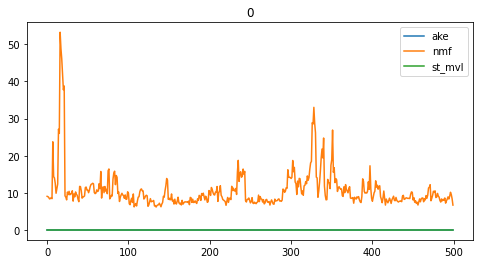

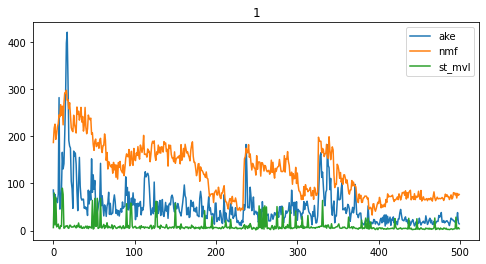

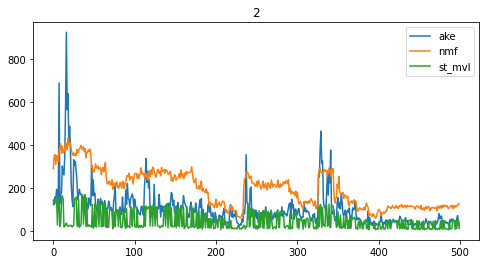

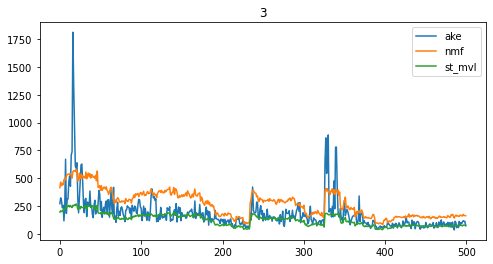

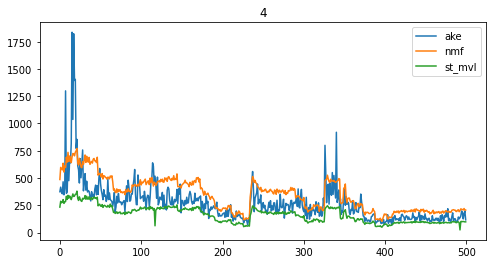

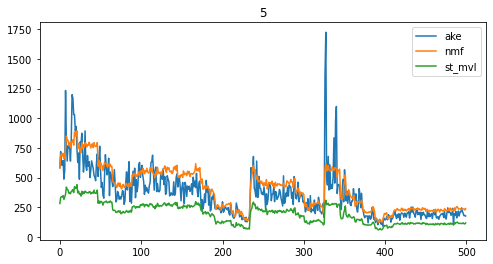

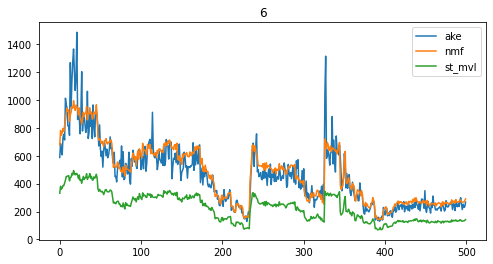

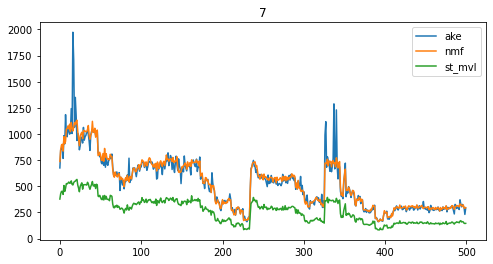

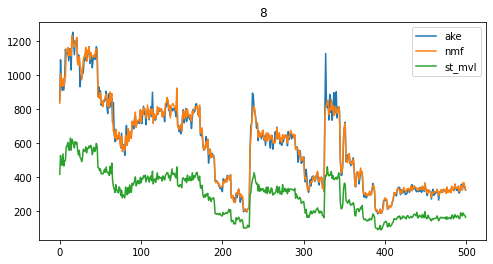

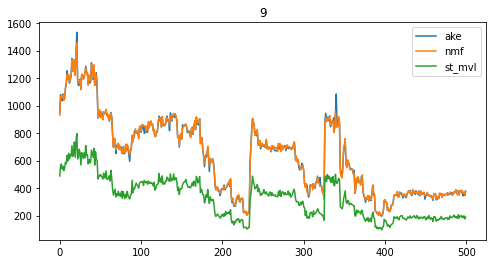

In [44]:
for j,i in enumerate(sota_mar):
    plt.figure()
    plt.title(j)
    ake_loss = i.ake_loss
    nmf_loss = i.nmf_loss
    st_mvl_loss = i.st_mvl_loss
    plt.plot(ake_loss,label='ake')
    plt.plot(nmf_loss,label='nmf')
    plt.plot(st_mvl_loss,label='st_mvl')
    plt.legend()
# sota_mar[1].ake_loss